# Vaje 9: Nenadzorovano učenje

## Naloga 1: Algoritem k-tih voditeljev

Najprej si bomo pogledali metodo k-tih voditeljev. Delali bomo z zgodovinskimi podatki glasovanja na Euroviziji in si pogledali, če lahko najdemo gruče (skupine) držav, ki pogosto glasujejo druga za drugo.

![Kmeans](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif)

1.a: Preberi podatke iz datoteke `vaje9_1.csv` (vaje 1), jih spremeni v numpy array, loči na imena držav in povprečno število glasov. Za tem spremeni vrednosti v matriki tako, da bo vsaka država sebi dala 12 točk (vrstni red držav je isti po vrsticah in stolpcih).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Podatki/vaje9.csv")
data = df.to_numpy()
names = data[:, 0]
votes = data[:, 1:]
for i in range(votes.shape[0]):
    votes[i, i] = 12

1.b: Z algoritmom KMeans (`sklearn.cluster.KMeans`) države gruči v 5 gruč in izpiši katere države se pojavijo znotraj katere gruče. Kaj opaziš, če algoritem večkrat poženeš?

In [3]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [4]:
kmeans = KMeans(n_clusters=5, max_iter=1000).fit_predict(votes, names)
for i in range(np.max(kmeans)+1):
    countries = names[i==kmeans]
    print(countries)

['Armenia' 'Belarus' 'Bulgaria' 'Cyprus' 'Georgia' 'Greece' 'Lithuania'
 'Moldova' 'Poland' 'Romania' 'Russia' 'Ukraine']
['Andorra' 'Belgium' 'France' 'Ireland' 'Italy' 'Luxembourg' 'Malta'
 'Monaco' 'Portugal' 'Spain' 'Turkey' 'United Kingdom']
['Croatia' 'Czech Republic' 'Slovenia']
['Austria' 'Denmark' 'Estonia' 'Finland' 'Germany' 'Hungary' 'Iceland'
 'Latvia' 'Norway' 'San Marino' 'Slovakia' 'Sweden' 'Switzerland'
 'The Netherlands']
['Albania' 'Bosnia & Herzegovina' 'F.Y.R. Macedonia' 'Montenegro' 'Serbia']


Vidimo lahko, da so gruče zelo nestabilne, torej so gruče z vsakim pogonom drugačne.

1.c: Z uporabo metrik `silhouette_score` in `calinski_harabasz_score` preveri kvaliteto gruč in najdi najboljši $k$. Za vsak $k$ algoritem večkrat poženi (npr. 100-krat).

In [5]:
for k in range(2, 10):
    silhouette = []
    calinski = []
    for i in range(100):
        predictions = KMeans(n_clusters=k).fit_predict(votes)
        silhouette.append(silhouette_score(votes, predictions))
        calinski.append(calinski_harabasz_score(votes, predictions))
    print(f"{k} clusters: {np.mean(silhouette)} ({np.var(silhouette)})")
    print(f"{k} clusters: {np.mean(calinski)} ({np.var(calinski)})")
    print()

2 clusters: 0.1255928180614543 (0.0017491869114467748)
2 clusters: 6.251339913481904 (1.8181679929459509)

3 clusters: 0.1155476181845507 (0.00045370666210261444)
3 clusters: 6.282350988300149 (1.1284113795464799)

4 clusters: 0.10563621935478892 (0.00027072589905409656)
4 clusters: 5.550965458611786 (0.14515664244392648)

5 clusters: 0.09547774565258253 (0.0002533262027911881)
5 clusters: 4.825656705510234 (0.11792763518247132)

6 clusters: 0.09211707287697436 (0.00023318303892673156)
6 clusters: 4.479830467078259 (0.06729736287793052)

7 clusters: 0.08726512697348605 (0.00023612036588390874)
7 clusters: 4.148986012618419 (0.05982071151896577)

8 clusters: 0.08822488349968531 (0.00021114746935798796)
8 clusters: 3.9764456757057784 (0.04297947725552809)

9 clusters: 0.08534048701822354 (0.00028800694979103206)
9 clusters: 3.804691654146503 (0.042191619799933314)



Vidimo, da je vrednost silhuete največja pri 2, 3 in 4ih gručah, a da so vrednosti silhuete tudi tu zelo nizke (vrednost silhuete je med -1 in 1; Rule of thumb: vrednosti 0.7 in več nakazujejo, da so gruče dobre, okoli 0.5 uredu in gruče s silhueto 0.25 slabe). Vrednosti silhuet v našem primeru nakazujejo, da so gruče slabe.

1.d: Zmanjšaj dimenzijo podatkov na 2 ali 3 z uporabo metode TSNE in algoritem k-gruč še enkrat poženi. So gruče sedaj bolj kvalitetne in stabilne? So gruče takšne, kot bi jih pričakoval?

In [6]:
from sklearn.manifold import TSNE

In [7]:
for k in range(2, 10):
    scores = []
    transformed_scores = []
    for i in range(10):
        transformed = TSNE(n_components=2).fit_transform(votes)
        predictions = KMeans(n_clusters=k).fit_predict(transformed)
        scores.append(silhouette_score(votes, predictions))
        transformed_scores.append(silhouette_score(transformed, predictions))
    print(f"{k} clusters: {np.mean(scores)} (+- {np.var(scores)})")
    print(f"{k} clusters: {np.mean(transformed_scores)} (+- {np.var(transformed_scores)})")
    print()

2 clusters: 0.10765322606628465 (+- 0.0004428134110092679)
2 clusters: 0.34832268953323364 (+- 0.00028045722865499556)

3 clusters: 0.10992535528682763 (+- 7.444155454998535e-05)
3 clusters: 0.4030742049217224 (+- 0.00030944234458729625)

4 clusters: 0.10657549915067707 (+- 9.258259840060981e-05)
4 clusters: 0.40631741285324097 (+- 0.0003945749194826931)

5 clusters: 0.09691614076644392 (+- 0.00017319812330151958)
5 clusters: 0.3927471339702606 (+- 0.00029397656908258796)

6 clusters: 0.08309804130345211 (+- 4.0805186231777923e-05)
6 clusters: 0.4048043191432953 (+- 0.0006701177917420864)

7 clusters: 0.09163364249202155 (+- 6.272125932899999e-05)
7 clusters: 0.40732651948928833 (+- 0.000887608272023499)

8 clusters: 0.0863634710382981 (+- 0.00015846834621139957)
8 clusters: 0.4137435555458069 (+- 0.0009652917506173253)

9 clusters: 0.09280807168474177 (+- 0.00014670645982774435)
9 clusters: 0.44058647751808167 (+- 0.0005176105769351125)



In [12]:
kmeans = KMeans(n_clusters=7, max_iter=1000).fit_predict(transformed, names)
for i in range(np.max(kmeans)+1):
    countries = names[i==kmeans]
    print(countries)

['Albania' 'Bosnia & Herzegovina' 'Croatia' 'F.Y.R. Macedonia'
 'Montenegro' 'Serbia' 'Slovenia']
['Belgium' 'Czech Republic' 'Estonia' 'Hungary' 'Latvia' 'Poland']
['Denmark' 'Finland' 'Iceland' 'Ireland' 'Italy' 'Luxembourg' 'Monaco'
 'Norway' 'Sweden' 'United Kingdom']
['Bulgaria' 'Cyprus' 'France' 'Greece' 'Romania' 'San Marino' 'Turkey']
['Austria' 'Germany' 'Malta' 'Slovakia' 'Switzerland' 'The Netherlands']
['Andorra' 'Lithuania' 'Portugal' 'Spain']
['Armenia' 'Belarus' 'Georgia' 'Moldova' 'Russia' 'Ukraine']


Sedaj so gruče bolj stabilne. Ob pogledu na gruče vidimo, da so države, za katere pričakujemo da bodo skupaj, res skupaj (ex-yu države; Armenia', 'Belarus', 'Georgia', 'Moldova', 'Russia', 'Ukraine'; ...)

## Naloga 2: Hierarhično razvrščanje

Za hierarhično razvrščanje bomo poleg knjižnjice sklearn uporabljali tudi knjižnjico scipy, saj nam omogoča lažji izris dendrograma z rezultati. Knjižnjica scipy se načeloma inštalira skupaj s knjižnjico sklearn, lahko jo pa inštaliramo tudi z ukazom `pip install scipy`.

2.a: Z uporabo knjižnjice sklearn in metode hierarhičnega razvrščanja sestavi 5 gruč držav na transformiranih podatkih iz prve naloge ter države v gručah izpiši.


<details>
  <summary>Namig:</summary>

  *V knjižnjici sklearn se hierarhično razvrščanje pojavi pod imenom [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)*.
   
</details>

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
hierarhical = AgglomerativeClustering(n_clusters=5).fit_predict(transformed, names)
for i in range(np.max(hierarhical)+1):
    countries = names[i==hierarhical]
    print(countries)

print(silhouette_score(transformed, hierarhical))

['Austria' 'Belgium' 'Czech Republic' 'Denmark' 'Finland' 'Germany'
 'Hungary' 'Iceland' 'Ireland' 'Luxembourg' 'Malta' 'Monaco' 'Norway'
 'Poland' 'Slovakia' 'Sweden' 'Switzerland' 'The Netherlands'
 'United Kingdom']
['Andorra' 'Estonia' 'Italy' 'Latvia' 'Lithuania' 'Portugal' 'Spain']
['Bosnia & Herzegovina' 'Croatia' 'F.Y.R. Macedonia' 'Montenegro' 'Serbia'
 'Slovenia']
['Albania' 'Bulgaria' 'Cyprus' 'France' 'Greece' 'Romania' 'San Marino'
 'Turkey']
['Armenia' 'Belarus' 'Georgia' 'Moldova' 'Russia' 'Ukraine']
0.39590997


2.b: Verzija hierarhičnega razvrščanja, ki jo bomo uporabili na začetku na vsak podatek gleda kot na posamezno gručo, nato pa gruče postopoma združuje z različnimi metodami povezovanja. Poskusi različne metode združevanja: "single", pri kateri razdaljo definiramo kot najmanjšo razdaljo med pari točk v gručah; "average", ki razdaljo definira kot povprečno razdaljo med pari točk znotraj gruč; "complete", ki razdaljo med gručami definira kot maksimalno razdaljo med pari točk in "ward", ki minimizira varianco gruč, ki jih združimo. Za vsako metodo povezovanja preveri silhueto gruč.

In [17]:
for linkage in ["single", "average", "complete", "ward"]:
    hierarhical = AgglomerativeClustering(n_clusters=5, linkage=linkage).fit_predict(transformed, names)
    # for i in range(np.max(hierarhical)+1):
        # countries = names[i==hierarhical]
        # print(countries)

    print(linkage, silhouette_score(transformed, hierarhical))

single 0.080026224
average 0.35467204
complete 0.38577864
ward 0.39590997


2.c: Sedaj gruče poiščimo s knjižnjico scipy ([scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)) in metodo `linkage`, ki nam vrne matriko združevanja. Z matriko združevanja in metodo `dendrogram`, lahko izrišemo dendrogram/našo hierarhijo. Nariši dendrograme za različne metode povezovanja. Pri funkciji `dendrogram` ne pozabi parametra *labels*, s katerim podatkom dodaš ime, za lepši izpis. Število clustrov določite s parametrom *color_threshold*, ki določi razdaljo pri kateri "povezave med gručami razrežemo". Metodo povezovanja lahko v funkciji `linkage` spreminjaš s parametrom *method*.

In [18]:
from scipy.cluster import hierarchy

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [195.0, 195.0, 221.25, 221.25],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [208.125, 208.125, 263.75, 263.75],
  [185.0, 185.0, 235.9375, 235.9375],
  [170.0, 170.0, 210.46875, 210.46875],
  [133.75, 133.75, 190.234375, 190.234375],
  [110.0, 110.0, 161.9921875, 161.9921875],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [375.0, 375.0, 385.0, 385.0],
  [343.75, 343.75, 380.0, 380.0],
  [325.0, 325.0, 361.875, 361.875],
  [3

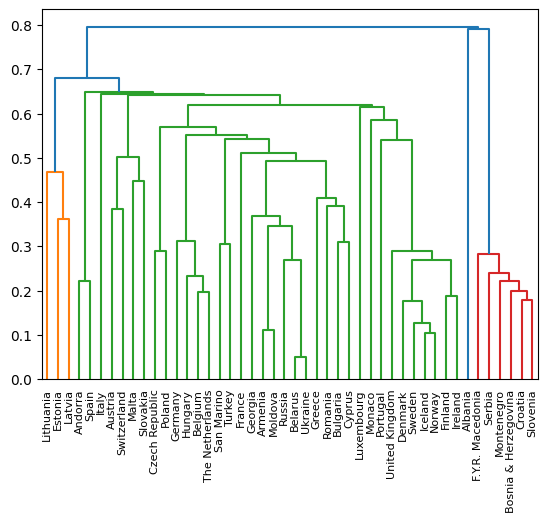

In [19]:
hierarhical = hierarchy.linkage(transformed)
hierarchy.dendrogram(hierarhical, labels=names, color_threshold=0.65)

## Dodatna naloga: DBSCAN

D.a: Poglej si kako deluje algoritem DBSCAN in sestavi podatkovno množico, na kateri bo pravilno našel gruče, medtem to bo algoritem k voditeljev pri iskanju gruč neuspešen.

D.b: Z uporabo plt.scatter na podatkih iz naloge D.a vizualiziraj gruče, ki jih dobiš z algoritmom k voditeljev in DBSCAN-om.

D.c: Sestavi podatkovno množico, na kateri bo algoritem k voditeljev našel pravilne gruče, DBSCAN pa ne.